In [1]:
##### CONFIGURACIÓN DE ENTORNO #####
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

from google.colab import drive     # Conectar Google drive
drive.mount('/content/drive/')

import xarray as xr, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import os

path = '/content/drive/MyDrive/Trabajos_UNALM/M. Tropical/P1_MTropicalD/'  # Directorio de trabajo
os.chdir(path)    # Seleccionar carpeta de trabajo

save_dict = {'transparent':False,'pad_inches':0.05, 'bbox_inches':'tight', 'facecolor':'white'} # Argumentos genéricos de savefig


Mounted at /content/drive/


In [3]:
data_horaria = [984.2,983.6,983.3,983.2,983.5,984.1,984.7,985.1,985.3,985.2,984.8,984.4,984.0,983.5,983.0,982.7,982.9,983.2,983.7,984.4,984.9,985.2,985.2,984.8]
data_mensual = [983.2, 983.2, 982.3, 983.0, 984.0, 984.3, 985.3, 983.9, 983.0, 984.5, 984.5, 984.2]

#O1: Datos horarios

Armónico n°1: Ai = 0.33149 ; Bi = 0.06599
Armónico n°2: Ai = -0.98130 ; Bi = 0.49121
Armónico n°3: Ai = -0.13148 ; Bi = 0.11482


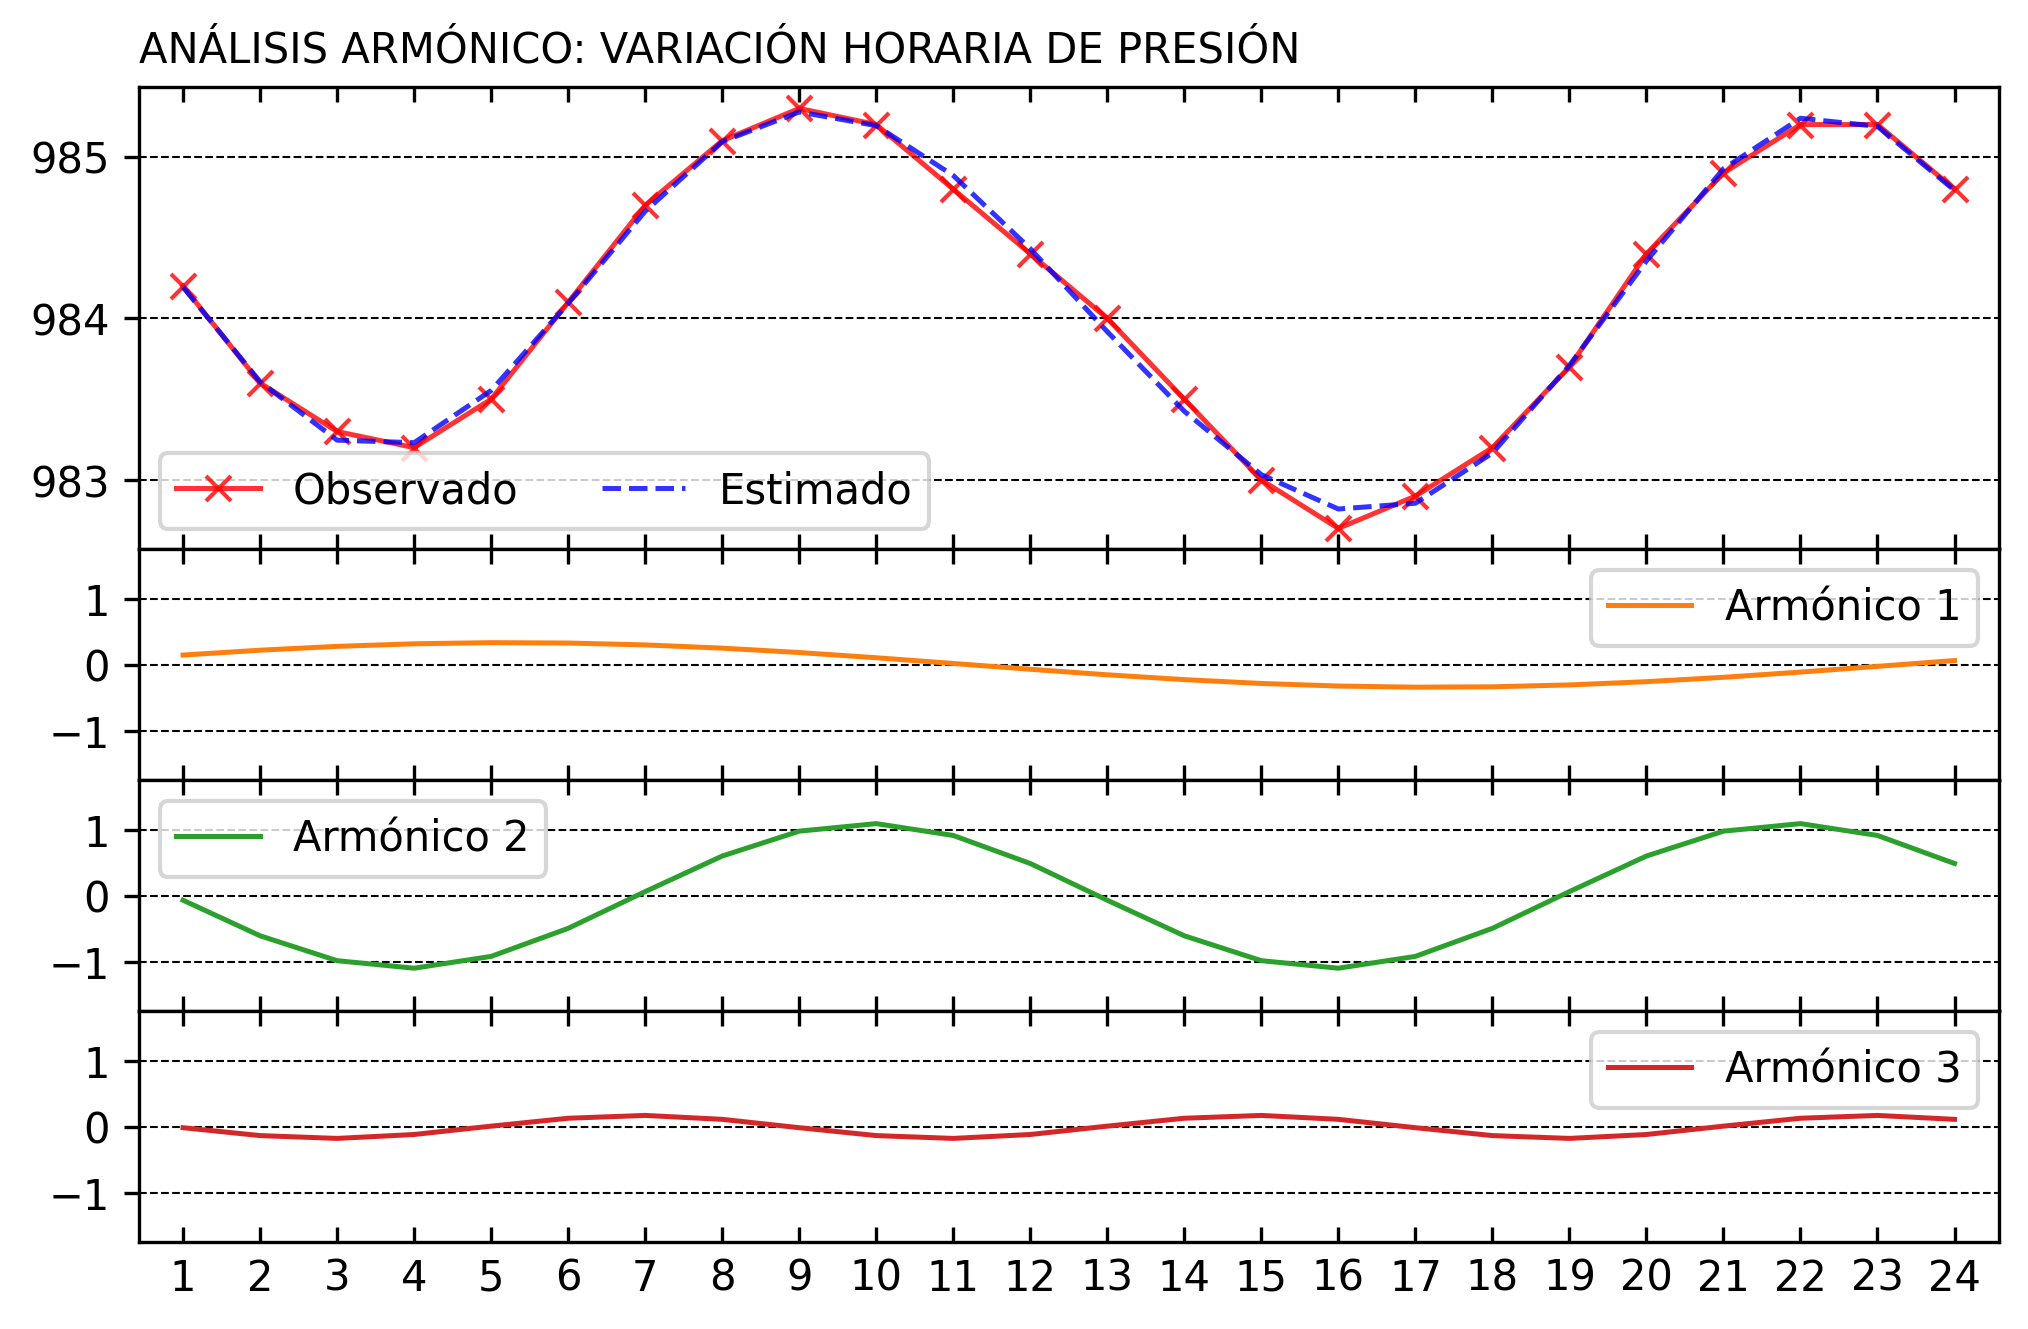

In [4]:
#@title DESCOMPOSICIÓN DE ARMÓNICOS
Press = np.array(data_horaria)  # Eje y
t = np.arange(1, len(Press)+1)  # Eje x

############# Cálculo de armónicos #############
N = len(Press)  # 24 valores (numpy Array)
P = 24 / 1      # n° valores/ciclo: 24 horas / 1 día
nH = 3          # n° de armónicos

Press_mean = np.mean(Press)     # Promedio
def Harmonic(t, var, N, P, i = 1):
    import numpy as np
    from numpy import pi, sin, cos
    
    Ai = 2/N * np.sum( var * sin(2*pi/P * i * t) )
    Bi = 2/N * np.sum( var * cos(2*pi/P * i * t) )

    print(f'Armónico n°{i}: Ai = {Ai:.5f} ; Bi = {Bi:.5f}')
    H = Ai*sin(2*pi/P * i * t) + Bi*cos(2*pi/P * i * t)
    return H, Ai, Bi

################################################## ARMÓNICOS
# Definiendo estilo
rc = {'figure.dpi': 300, 'figure.subplot.hspace': 0., 'savefig.bbox': 'tight', 'savefig.transparent': False,
      'axes.facecolor': '#FFFFFF', 'axes.xmargin': 0.025,
      'axes.titlesize': 10, 'axes.titlelocation': 'left', 'axes.titlesize': 10, 'axes.labelsize': 8,
      'xtick.labelsize': 10, 'xtick.top': True, 'xtick.direction': 'in', 'ytick.labelsize': 10,
      'lines.linewidth': 1.2, 'lines.markersize': 6,
      'legend.markerscale':   1., 'legend.fontsize': 10,
      'axes.grid': True, 'axes.grid.axis': 'y', 
      'grid.linestyle': '--', 'grid.linewidth': 0.5, 'grid.color': 'k', 'grid.alpha': 1.0}

with plt.rc_context(rc):
    fig, ax = plt.subplots(1 + nH,1, figsize = (8,5), sharex = True,
                           gridspec_kw={'width_ratios':[1], 'height_ratios':[2] + [1]*nH})

    acc = np.full((N,),Press_mean)
    for i in range(1,nH+1):
        H, Ai, Bi = Harmonic(t, Press, N, P, i)
        ax[i].plot(t, H, label = f'Armónico {i}', color = f'C{i}')
        ax[i].set_ylim(-1.75, 1.75)
        ax[i].legend(ncol = 4)
    
        acc += H
    
    ax[0].plot(t,Press, 'rx-', alpha = 0.8,label = 'Observado')
    ax[0].plot(t,acc,'b--', alpha = 0.8, label = 'Estimado')
    ax[0].legend(ncol = 2)

    ax[0].set_title(f'ANÁLISIS ARMÓNICO: VARIACIÓN HORARIA DE PRESIÓN')

    plt.xticks(t)
    plt.show()

    fig.savefig('PRESSURE_HOURLY.png', **save_dict)

Armónico n°1: Ai = 0.33149 ; Bi = 0.06599
Armónico n°2: Ai = -0.98130 ; Bi = 0.49121
Armónico n°3: Ai = -0.13148 ; Bi = 0.11482
Armónico n°4: Ai = 0.03608 ; Bi = 0.00417
Armónico n°5: Ai = -0.03027 ; Bi = 0.00442
Armónico n°6: Ai = 0.00833 ; Bi = -0.01667


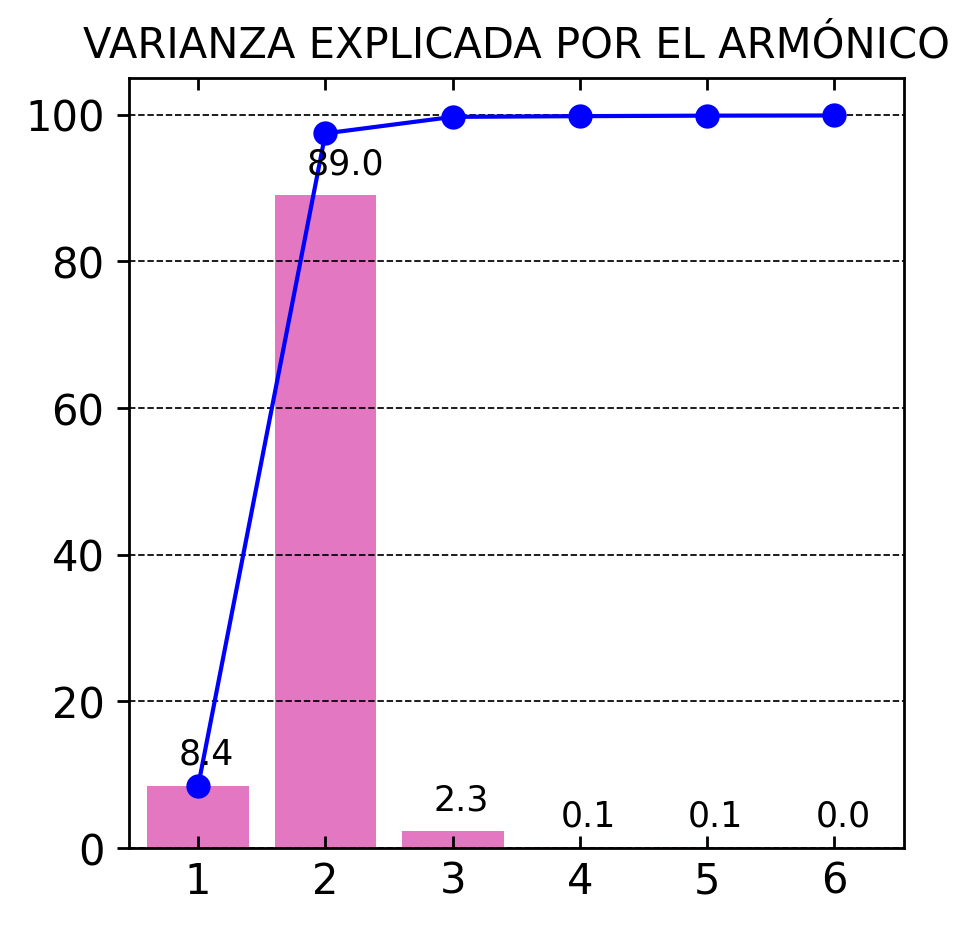

In [5]:
#@title VARIANZA EXPLICADA POR ARMÓNICOS
N = len(Press)  # 24 valores
P = 24 / 1      # n° valores/ciclo: 24 horas / 1 día
nH = 6          # n° de armónicos
Press_mean = np.mean(Press)     # Promedio

##################################################
# Definiendo estilo
rc = {'figure.dpi': 250, 'figure.subplot.hspace': 0., 'savefig.bbox': 'tight', 'savefig.transparent': False,
      'axes.facecolor': '#FFFFFF', 'axes.xmargin': 0.025,
      'axes.titlesize': 10, 'axes.titlelocation': 'center', 'axes.titlesize': 12, 'axes.labelsize': 8,
      'xtick.labelsize': 12, 'xtick.top': True, 'xtick.direction': 'in', 'ytick.labelsize': 12,
      'lines.linewidth': 1.2, 'lines.markersize': 6,
      'legend.markerscale':   1., 'legend.fontsize': 12,
      'axes.grid': True, 'axes.grid.axis': 'y', 
      'grid.linestyle': '--', 'grid.linewidth': 0.5, 'grid.color': 'k', 'grid.alpha': 1.0}

with plt.rc_context(rc):
    fig, ax = plt.subplots(1,1, figsize = (4,4), sharex = True)
                        
    C = np.array([])
    for i in range(1,nH+1):
        H, Ai, Bi = Harmonic(t, Press, N, P, i)
        C = np.append(C, [ (Ai**2 + Bi**2) / (2 * np.std(Press)**2) * 100 ])
    
    ax.bar(x = range(1,nH+1), height = C, label = f'Armónico {i}', color = f'C{i}')
    ax.plot(range(1,nH+1), np.cumsum(C), 'bo-')

    for index, value in enumerate(C, start = 1):
        ax.text(index-0.15, value+3, f'{value:.1f}')

    ax.set_ylim(0,105)
    ax.set_title('VARIANZA EXPLICADA POR EL ARMÓNICO')
    plt.xticks(range(1,nH+1))
    fig.savefig('VAR_PRESSURE_HOURLY.png', **save_dict)

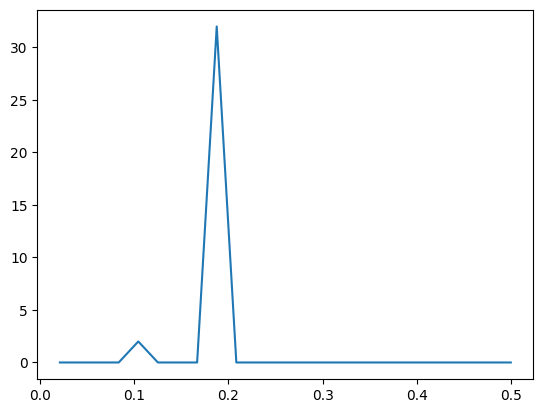

In [9]:
#@title PERÍODOGRAMA (test)
from numpy import cos, pi, sin, sqrt, abs, sum
from scipy.fft import fft

# https://stats.libretexts.org/Bookshelves/Advanced_Statistics/Time_Series_Analysis_(Aue)/4%3A_Spectral_Analysis/4.1%3A_Introduction_to_Spectral_Analysis

def Power(x, n):
    d = fft(x) / sqrt(n)
    I = abs( d ) ** 2
    return (4/n) * I

n = 48
########
t = np.arange(1,n+1)

x1 = cos(2*pi*t/12)+sin(2*pi*t/12)
x2 = 4*cos(2*pi*t/6)+4*sin(2*pi*t/6)
x = x1 + x2

f = np.arange(1,n/2+1) / n
P = Power(x, n)

plt.plot(f, P[0:24])

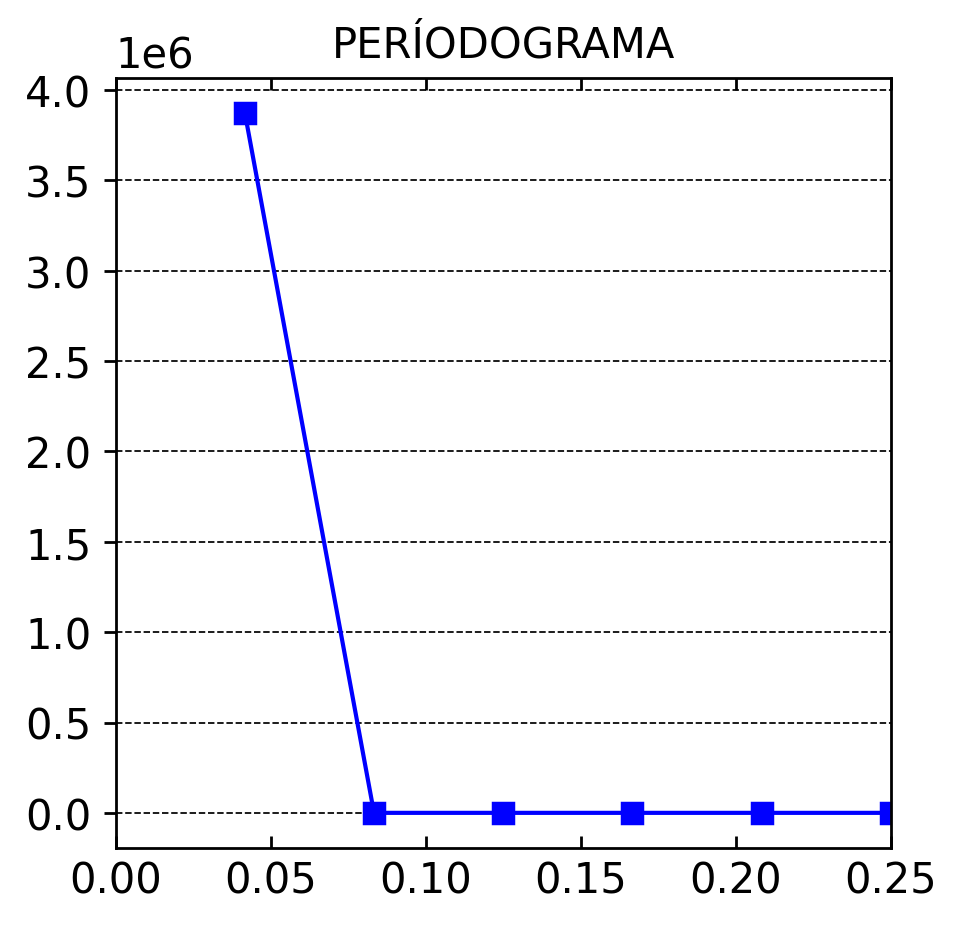

In [15]:
#@title PERÍODOGRAMA
n = 24  # Período

############# Cálculo de poder #############
# https://stats.libretexts.org/Bookshelves/Advanced_Statistics/Time_Series_Analysis_(Aue)/4%3A_Spectral_Analysis/4.1%3A_Introduction_to_Spectral_Analysis
from numpy import cos, pi, sin, sqrt, abs, sum
from scipy.fft import fft

def Power(x, n):
    d = fft(x) / sqrt(n)
    I = abs( d ) ** 2
    return (4/n) * I

##################################################
# Definiendo estilo
rc = {'figure.dpi': 250, 'figure.subplot.hspace': 0., 'savefig.bbox': 'tight', 'savefig.transparent': False,
      'axes.facecolor': '#FFFFFF', 'axes.xmargin': 0.025,
      'axes.titlesize': 10, 'axes.titlelocation': 'center', 'axes.titlesize': 12, 'axes.labelsize': 8,
      'xtick.labelsize': 12, 'xtick.top': True, 'xtick.direction': 'in', 'ytick.labelsize': 12,
      'lines.linewidth': 1.2, 'lines.markersize': 6,
      'legend.markerscale':   1., 'legend.fontsize': 12,
      'axes.grid': True, 'axes.grid.axis': 'y', 
      'grid.linestyle': '--', 'grid.linewidth': 0.5, 'grid.color': 'k', 'grid.alpha': 1.0}

with plt.rc_context(rc):
    fig, ax = plt.subplots(1,1, figsize = (4,4), sharex = True)

    t = np.arange(1,n+1)

    f = np.arange(1,n/4+1) / n
    P = Power(Press, n)

    ax.plot(f, P[:6], 'bs-')
    ax.set_xlim(0,0.25)
    ax.set_title('PERÍODOGRAMA')
    fig.savefig('PERIODOGRAM_HOURLY.png', **save_dict)